# Resume Analyzer Backend
This notebook processes the resume dataset and provides basic analysis.

In [3]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('AI_Resume_Screening.csv')
df.head()


,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [4]:
# Check for missing values
df.isnull().sum()

Resume_ID                   0
Name                        0
Skills                      0
Experience (Years)          0
Education                   0
Certifications            274
Job Role                    0
Recruiter Decision          0
Salary Expectation ($)      0
Projects Count              0
AI Score (0-100)            0
dtype: int64

In [5]:
#filling null values
df['Certifications'].fillna("Not Provided", inplace=True)

C:\Users\tgout\AppData\Local\Temp\ipykernel_16076\1261131328.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certifications'].fillna("Not Provided", inplace=True)


In [6]:
# Extract common skills from resumes
skills_list = ['python', 'java', 'sql', 'machine learning', 'deep learning', 'excel', 'communication', 'data analysis', 'c++', 'html', 'css']

def extract_skills(text):
    text = text.lower()
    found = [skill for skill in skills_list if skill in text]
    return found

df['Extracted_Skills'] = df['Skills'].apply(extract_skills)
df[['Job Role', 'Extracted_Skills']].head()


,Job Role,Extracted_Skills
0,AI Researcher,[]
1,Data Scientist,"[python, sql, machine learning, deep learning]"
2,Cybersecurity Analyst,[]
3,AI Researcher,[python]
4,Software Engineer,"[java, sql]"


In [8]:
df.to_csv('AI_Resume_Screening.csv', index=False)
print("Saved processed resumes with extracted skills.")


Saved processed resumes with extracted skills.


In [9]:
X = df[['Experience (Years)', 'Projects Count']]
y = df['Recruiter Decision']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [12]:
# Evaluate
from sklearn.metrics import accuracy_score, classification_report
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.97
Testing Accuracy: 0.95


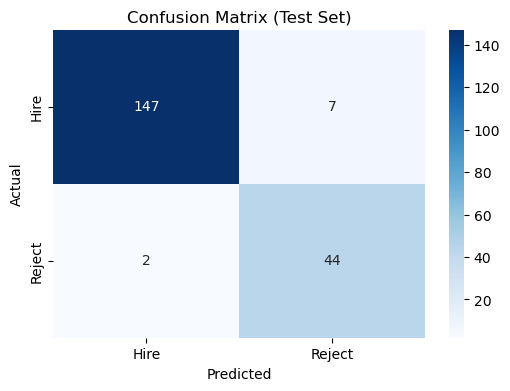

In [14]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

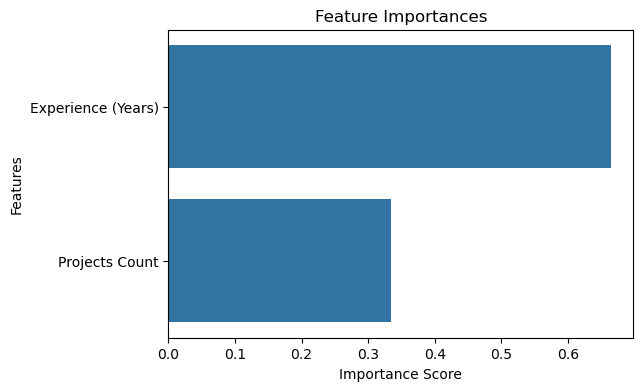

In [15]:
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [16]:
import joblib

# Save the trained model to a file
joblib.dump(model, "saved_model.pkl")
print("Model saved as saved_model.pkl")

Model saved as saved_model.pkl
